# Konics Demo
The `konics` package primarily consists of the [track api (demo)](/notebooks/track-api.ipynb) and the [drive api (demo)](/notebooks/drive-api.ipynb). The Track API provides an object-oriented interface for designing tracks and rendering them from arbitrary viewpoints while the Drive API create a virtual "car" which can drive around on a Track. Check out the demos (see above links) to see how these API's work.

I am currently planning a Environment API which unifies the Track and Drive APIs and provides a reinforcement learning environment with rewards and stuff. It will work something like shown below, but has not been implemented yet:

```
env = Environment(map_file="cool_map.json")
while env.alive():
    state = env.state()
    reward = env.action(steering=0.1)
```

Next steps include building `konics-designer`, a web app which makes it easy for you to drop a few cones, draw a path through the cones, and export it into a simulation map file. The RL agent is penalized based on how far away from the path they deviate.

## Prototype (Track Design w/ Parametric Equations)

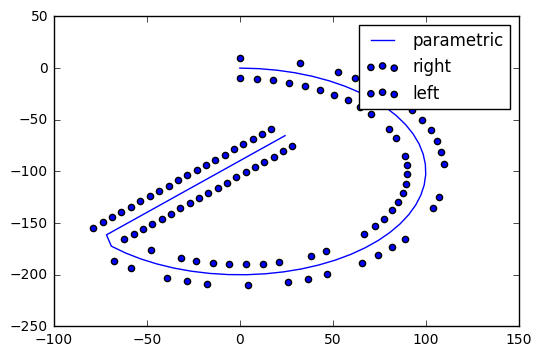

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from konics import *

timesteps = np.linspace(0.0,100.0,num=1000)

def d(f,t):
    epsilon = 1e-5
    return (f(t+epsilon)-f(t-epsilon)) /  (2.0 * epsilon)

def f_x(t):
    if t > 4:
        return f_x(4) + t
    return np.sin(t)*100

def f_y(t):
    if t > 4:
        return f_y(4) + t
    return np.cos(t)*100 - 100

x = [f_x(t) for t in timesteps]
y = [f_y(t) for t in timesteps]

track = Track(size=512)

nx = []
ny = []
for t in timesteps:
    dx = d(f_x, t)
    dy = d(f_y, t)
    normal = np.cross(np.array([dx, dy, 0]), np.array([0,0,1]))
    normal = 10.0 * normal / np.linalg.norm(normal)
    if random.random() < 0.1:
        continue
    if len(nx) > 0 and abs(f_x(t) + normal[0] - nx[-1]) < 5.0:
        if len(ny) > 0 and abs(f_y(t) + normal[1] - ny[-1]) < 5.0:
            continue
    nx.append(f_x(t) + normal[0])
    ny.append(f_y(t) + normal[1])
    track.add(Cone(nx[-1], ny[-1]))
    if random.random() < 0.5:
        track.add(Cone(nx[-1]+normal[0]/2, ny[-1]+normal[1]/2, math.atan2(-normal[1],-normal[0])))

nnx = []
nny = []
for t in timesteps:
    dx = d(f_x, t)
    dy = d(f_y, t)
    normal = -np.cross(np.array([dx, dy, 0]), np.array([0,0,1]))
    normal = 10.0 * normal / np.linalg.norm(normal)
    if random.random() < 0.3:
        continue
    if len(nnx) > 0 and abs(f_x(t) + normal[0] - nnx[-1]) < 5.0:
        if len(nny) > 0 and abs(f_y(t) + normal[1] - nny[-1]) < 5.0:
            continue
    nnx.append(f_x(t) + normal[0])
    nny.append(f_y(t) + normal[1])
    track.add(Cone(nnx[-1], nny[-1]))
    if random.random() < 0.5:
        track.add(Cone(nnx[-1]+normal[0]/2, nny[-1]+normal[1]/2, math.atan2(-normal[1],-normal[0])))

plt.figure()
plt.plot(x, y, label="parametric")
plt.scatter(nx, ny, label="right")
plt.scatter(nnx, nny, label="left")
plt.legend()
plt.show()

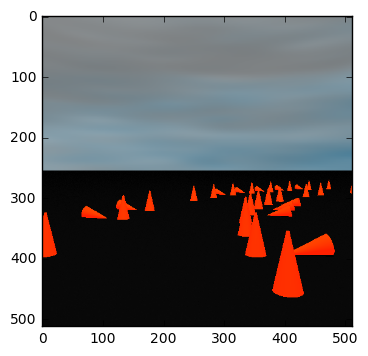

In [2]:
drive = Drive(track)
drive.rotate(-math.pi/2-0.3)
plt.figure()
plt.imshow(drive.render())
plt.show()

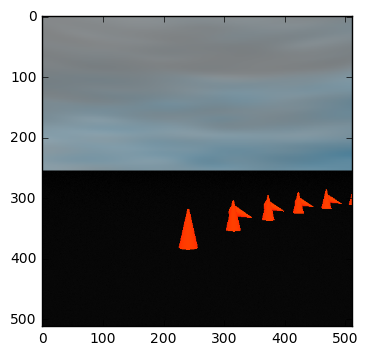

In [3]:
[drive.forward() for _ in range(10)]
plt.imshow(drive.render())
plt.show()